In [2]:
#상자수염 : 데이터의 불균형을 알기 쉽게 표현하는 그래프 ax.boxplot()

#용어 설명
 # 벗어난 값 : 수염의 하부 끝~상부 끝 이외(아웃라이어)
 # IQR : 사분위 범위
 # 수염 상부 끝 / 수염 하부 끝
 # 제1사분위점 : 모든 데이터의 하위부터 1/4(=Q1), 상자의 하부 끝. 
 # 중앙값 : 모든 데이터의 하위부터 1/2로 나눈 값 (=2사분위점)
 # 제3사분위점 : 모든 데이터의 하위부터 3/4로 나눈 값(=Q3), 상자의 상부 끝


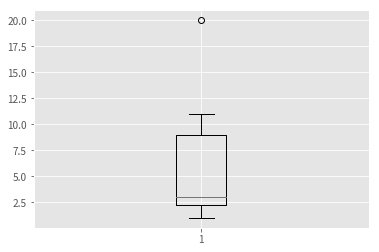

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = [1,2,3,3,11,20]
fig=plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(x)

plt.show()

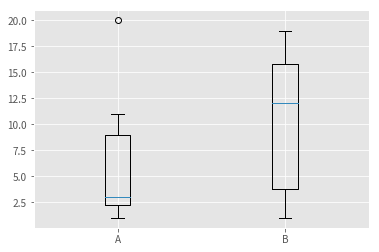

In [8]:
#여러개의 상자수염 그래프

#복수의 리스트 세트
x = [[1,2,3,3,11,20], [1,2,9,19,15,16]]
labels = ['A','B']

fig=plt.figure()
ax = fig.add_subplot(111)


#데이터와 레이블 지정
ax.boxplot(x, labels=labels)
plt.show()    

In [9]:
#상자수염 그래프 활용

import os
import pandas as pd

anime_master_csv = './anime/anime_master.csv'

df = pd.read_csv(anime_master_csv, index_col = 'anime_id')
df.head(3)

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


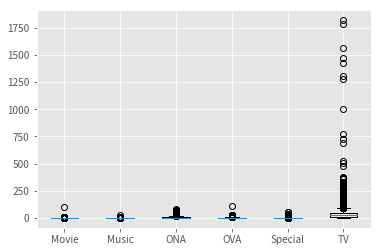

In [10]:
#배급 종별마다 에피소드 수 시각화

labels=[]
types_list=[]

for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())
    
fig=plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

plt.show()

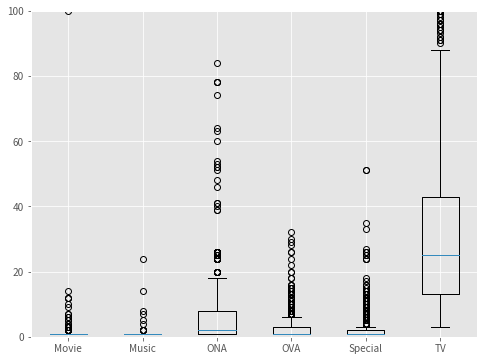

In [11]:
#위의 그래프가 모든 값에 대한 결과이기에, 상세한 내용은 알기 어렵다.
#set_ylim()메서드에서 그래프 그리기 범위 지정

fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

#y축 범위 지정
ax.set_ylim(0,100)
plt.show()

In [12]:
#사분위점 값을 descirbe()로 확인

df['episodes'][df['type'] == 'TV'].describe().round(1)

count    3330.0
mean       37.5
std        83.3
min         3.0
25%        13.0
50%        25.0
75%        43.0
max      1818.0
Name: episodes, dtype: float64

In [13]:
#서식설정. color, facecolor(채움색), linestyle, linewidth, marker(마카), markerfacecolor, markeredgecolor, markersize

#우선 데이터 세트 작성
import numpy as np

np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000)
          for mu in range (1,5)]

In [19]:
#서식 사전 만들기

#벗어난 값 서식 사전

flierprop = {'color': '#EC407A',
             'marker': 'o',
             'markerfacecolor': '#2196F3',
             'markeredgecolor': 'white',
             'markersize':5,
            'linestyle':'None',
            'linewidth':0.1}

#상자의 서식 사전
boxprop = {'color': '#2196F3',
            'linestyle':'--',
            'linewidth':1}

#수염의 서식 사전
whiskerprop = {'color': '#2196F3',
            'linestyle':'--',
            'linewidth':1}

#수염 끝단 서식 사전
capprop = {'color': '#2196F3',
            'linestyle':'--',
            'linewidth':1}

#중앙값 서식사전
medianprop = {'color': '#2196F3',
            'linestyle':'--',
            'linewidth':2}


#평균값 서식사전

meanprop = {'color': '#2196F3',
             'marker': '^',
             'markerfacecolor': '#2196F3',
             'markeredgecolor': 'white',
             'markersize':10,
            'linestyle':'None',
            'linewidth':1}

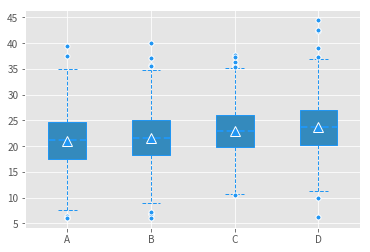

In [20]:
#그리기

fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(
     dataset,
     patch_artist = 'Patch', #서식을 설정하는 경우 Patch 선택
     labels=['A','B','C','D'], #항목 레이블
     showmeans=True, #평균값 그리기
     flierprops=flierprop, #벗어난 값 서식 설정
     boxprops=boxprop, #상자 서식 설정
     whiskerprops=whiskerprop, #수염 서식
     capprops=capprop, #수염 끝단
     medianprops=medianprop, #중앙값 서식
     meanprops=meanprop #평균값 서식
)
    
plt.show()

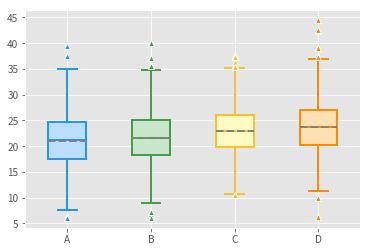

In [23]:
#상자마다 서식 설정 가능하다. set_ 접두사 이용

fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(dataset,patch_artist = 'Patch', labels=['A','B','C','D'], meanline=True, showmeans=True)

#컬러세트
colors1 = ['#2196F3', '#43A047', '#FBC02D', '#FB8C00']
colors2 = ['#BBDEFB', '#C8E6C9', '#FFF9C4', '#FFE0B2']
#위 아래로 나뉘어진 요소에 설정하기 위해 용도 수열

n = [0, 0, 1, 1, 2, 2, 3, 3]

#서식 설정
#상자와 벗어난 값, 중앙값 서식
for params in zip(bp['boxes'],
                 bp['fliers'],
                 bp['medians'],
                   colors1,
                   colors2):
    
    bpb, bpf, med, color1, color2 = params
    #상자 서식 설정
    bpb.set_color(color1)
    bpb.set_facecolor(color2)
    bpb.set_linewidth(2)
    
    #벗어난 값 서식
    bpf.set(marker = '^', color=color2)
    bpf.set_markeredgecolor("white")
    bpf.set_markerfacecolor(color1)
    
    #중앙값
    med.set_color(color1)
    med.set_linewidth(2)
    
    #수염과 수염 끝단 서식
    for bpc, bpw, m in zip(bp['caps'], bp['whiskers'], n):
        bpc.set_color(colors1[m])
        bpc.set_linewidth(2)
        bpw.set_color(colors1[m])
        bpw.set_linewidth(2)
        
    #평균값 서식
    for mean, color2 in zip(bp['means'], colors2):
        mean.set_color('grey')
        mean.set_linewidth(2)
        mean.set_linestyle('--')
        
plt.show()